In [21]:
import mysql.connector
import json

# Replace with your MySQL connection details
host =  '10.8.0.1'
username = 'pere'
password = 'Nemomola5'
database_name =  'KOAMachines'

# Create a connection to the MySQL server
db_connection = mysql.connector.connect(
    host=host,
    user=username,
    password=password,
    database=database_name
)

# Create a cursor to execute SQL commands
mycursor = db_connection.cursor()

# Now you can execute SQL queries
mycursor.execute("SELECT id_maquina, TIME_STAMP, EV_IDLE, CICLE_A_MITGES, TEMPS_PER_ACABAR FROM estat ORDER BY `estat`.`TIME_STAMP` DESC")

# Fetch the results
result = mycursor.fetchall()

# Close the connection when done
db_connection.close()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.DataFrame(result, 
                  columns = ["id_maquina", "TIME_STAMP", "EV_IDLE", "CICLE_A_MITGES", "TEMPS_PER_ACABAR"])
df = df.head(10000).iloc[::-1]

In [122]:
# These ids: 599, 681, 592
df["id_maquina"].unique(), df["TIME_STAMP"].min(), df["TIME_STAMP"].max()

(array([681, 599, 592]), '2024-02-03 10:01:21', '2024-02-07 20:11:07')

([<matplotlib.axis.YTick at 0x294cf6590>,
 [Text(0, 0, 'False'), Text(0, 1, 'True')])

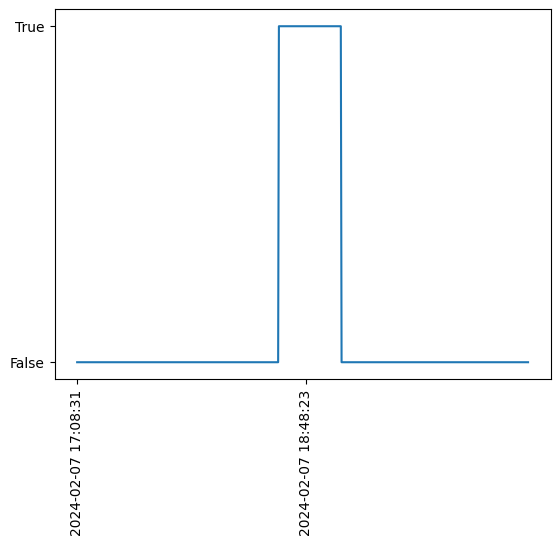

In [131]:
df_machine_filtered = df[df["id_maquina"]==592]

y_numeric = [0 if value == 'False' else 1 for value in df_machine_filtered["EV_IDLE"].to_list()]

plt.plot(df_machine_filtered["TIME_STAMP"], y_numeric)
plt.xticks(df_machine_filtered["TIME_STAMP"][::300], rotation=90)
plt.yticks([0, 1], ['False', 'True'])


In [132]:
data = df_machine_filtered["EV_IDLE"].to_list()
indices = []
prev = 'False'  # Assume the first element is 'False'

for i, val in enumerate(data):
    if val == 'True' and prev == 'False':
        indices.append(i)
    prev = val

df_machine_filtered.iloc[indices]

,id_maquina,TIME_STAMP,EV_IDLE,CICLE_A_MITGES,TEMPS_PER_ACABAR
1104,592,2024-02-07 18:42:56,True,False,0
